### 1. Setup Colab Environment & Mount Google Drive

In [3]:
# --- INSTALLATIONS ---
!pip install anomalib -q
!pip install torch torchvision -q

# --- IMPORTS ---
import os
import shutil
import matplotlib.pyplot as plt
from google.colab import drive
from anomalib.data import MVTec

# --- DRIVE & PATHS ---
drive.mount('/content/drive')
project_path = '/content/drive/MyDrive/MVTec_Anomaly_Detection'
os.makedirs(project_path, exist_ok=True)
print(f"Project path: {project_path}")

Mounted at /content/drive
Project path: /content/drive/MyDrive/MVTec_Anomaly_Detection


### 2. Configure and Prepare Dataset

In [6]:
# --- DATASET CONFIGURATION ---
from anomalib.data import MVTecAD # <-- CHANGE 1: Use MVTecAD

# Choose the MVTec category you want to use.
# Examples: 'bottle', 'cable', 'capsule', 'carpet', 'grid', 'hazelnut', etc.
CHOSEN_CATEGORY = 'bottle'

print(f"Loading category: {CHOSEN_CATEGORY}")

# The anomalib DataModule handles the download and preprocessing
datamodule = MVTecAD( # <-- CHANGE 1: Use MVTecAD
    # CHANGE 2: The 'image_size' argument is removed.
    # It's now handled by default transforms.
    root="~/torch/datasets",
    category=CHOSEN_CATEGORY,
    train_batch_size=32,
    eval_batch_size=32,
    num_workers=8
)

# This command downloads and prepares the data
datamodule.prepare_data()

print("Dataset prepared successfully.")

Loading category: bottle


mvtecad: 5.26GB [04:02, 21.7MB/s]                            


Dataset prepared successfully.


### 3. Visualize Training Data

Displaying a sample of training images...


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


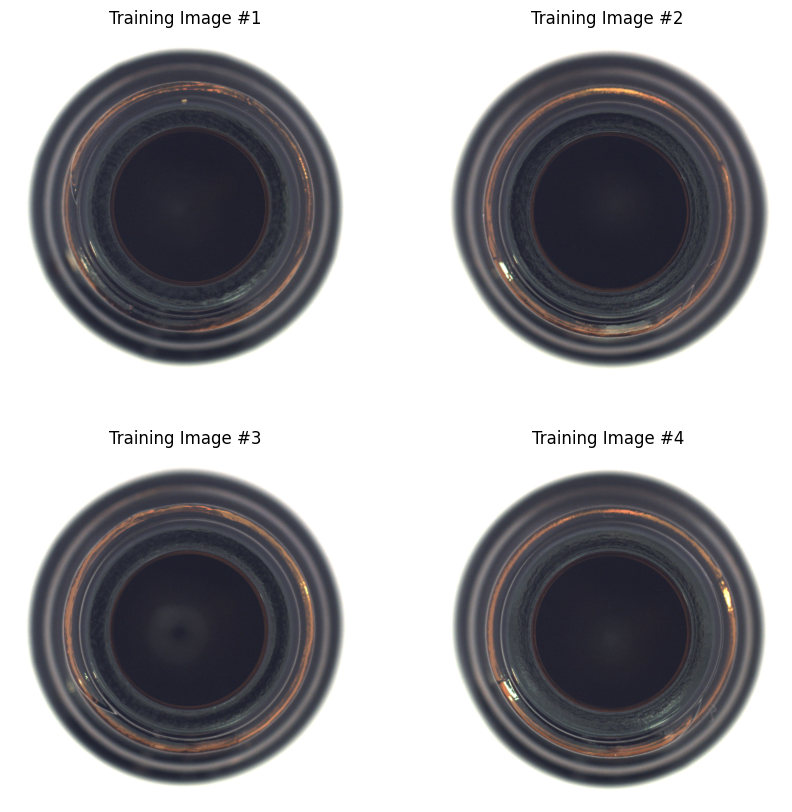

In [8]:
# --- VISUALIZATION ---

print("Displaying a sample of training images...")

# Set up the training dataset for visualization
datamodule.setup(stage='fit')
train_dataloader = datamodule.train_dataloader()

# Get one batch of images
# THE FIX IS HERE: We now use .image instead of ["image"]
images = next(iter(train_dataloader)).image

# Plot the first 4 images from the batch
plt.figure(figsize=(10, 10))
for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    # Convert tensor to numpy image and adjust channels
    img = images[i].permute(1, 2, 0).numpy()
    plt.imshow(img)
    plt.title(f"Training Image #{i+1}")
    plt.axis("off")
plt.show()

### 4. Finding the Bottle Dataset Location

In [12]:
# CÉLULA DE BUSCA: Encontra o caminho real do dataset
import subprocess

print(f"Procurando pelo diretório '{CHOSEN_CATEGORY}' no ambiente do Colab...")

# Este comando busca em todo o sistema de arquivos pelo diretório com o nome da categoria
command = f"find / -type d -name {CHOSEN_CATEGORY} 2>/dev/null"
result = subprocess.run(command, shell=True, capture_output=True, text=True)

# Pegamos o primeiro resultado da busca e limpamos a string
real_source_path = result.stdout.strip().split('\n')[0]

if real_source_path:
    print(f"✅ Sucesso! O diretório foi encontrado em: {real_source_path}")
else:
    print(f"❌ Falha! O diretório '{CHOSEN_CATEGORY}' não foi encontrado. Verifique se a célula 2 rodou sem erros.")

Procurando pelo diretório 'bottle' no ambiente do Colab...
✅ Sucesso! O diretório foi encontrado em: /content/~/torch/datasets/bottle


### 5. Saving the Dataset

In [13]:
# CÉLULA DE CÓPIA (VERSÃO FINAL)
import os
import shutil

# O caminho de destino no seu Google Drive (continua o mesmo)
destination_path = os.path.join(project_path, 'datasets', CHOSEN_CATEGORY)

print(f"Caminho de origem (encontrado): {real_source_path}")
print(f"Caminho de destino:             {destination_path}")

# Verifica se o caminho de origem foi encontrado antes de tentar copiar
if real_source_path and os.path.exists(real_source_path):
    if not os.path.exists(destination_path):
        print(f"\nCopiando dados...")
        # A cópia agora usará o caminho 100% correto
        shutil.copytree(real_source_path, destination_path)
        print("Cópia concluída com sucesso!")
    else:
        print(f"\nO diretório de destino já existe. Nenhuma cópia foi feita.")
else:
    print("\n❌ Erro: O caminho de origem não foi encontrado. Rode a célula de busca novamente.")

Caminho de origem (encontrado): /content/~/torch/datasets/bottle
Caminho de destino:             /content/drive/MyDrive/MVTec_Anomaly_Detection/datasets/bottle

Copiando dados...
Cópia concluída com sucesso!
